### Import dataset 

In [9]:
from functions import *

import warnings
warnings.filterwarnings('ignore')

In [10]:
data= loaddataset('dataset.csv', 'Z8RsBpxhnkebK5fvahVCmfV7icO2')

In [11]:
data

,uid,time,valueHR,valuesteps,WkHR,WkCal,WkSteps,sec,sugarValue,cal,carbs,fat,fiber,protein,sodium
823,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 12:00:00,77.0,0.0,0.0,0.0,0.0,0.0,90.82098,0.0,0.0,0.0,0.0,0.0,0.0
824,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 12:15:00,75.0,49.0,0.0,0.0,0.0,0.0,90.61686,0.0,0.0,0.0,0.0,0.0,0.0
825,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 12:30:00,73.0,71.0,0.0,0.0,0.0,0.0,86.22828,0.0,0.0,0.0,0.0,0.0,0.0
826,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 12:45:00,89.0,650.0,0.0,0.0,0.0,0.0,82.04382,0.0,0.0,0.0,0.0,0.0,0.0
827,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 13:00:00,97.0,393.0,0.0,0.0,0.0,0.0,79.90056,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-23 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,102.35376,0.0,0.0,0.0,0.0,0.0,0.0
2095,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-23 21:15:00,0.0,0.0,0.0,0.0,0.0,0.0,102.76200,0.0,0.0,0.0,0.0,0.0,0.0
2096,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-23 21:30:00,0.0,0.0,0.0,0.0,0.0,0.0,108.47736,0.0,0.0,0.0,0.0,0.0,0.0
2097,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-23 21:45:00,0.0,0.0,0.0,0.0,0.0,0.0,105.51762,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:

data1=preprocess(data, 0)
data2=preprocess(data,1)

In [13]:
data1.head()

,sugarValue
time,
2020-01-09 12:00:00,90.82098
2020-01-09 12:15:00,90.61686
2020-01-09 12:30:00,86.22828
2020-01-09 12:45:00,82.04382
2020-01-09 13:00:00,79.90056


### Plot the original data

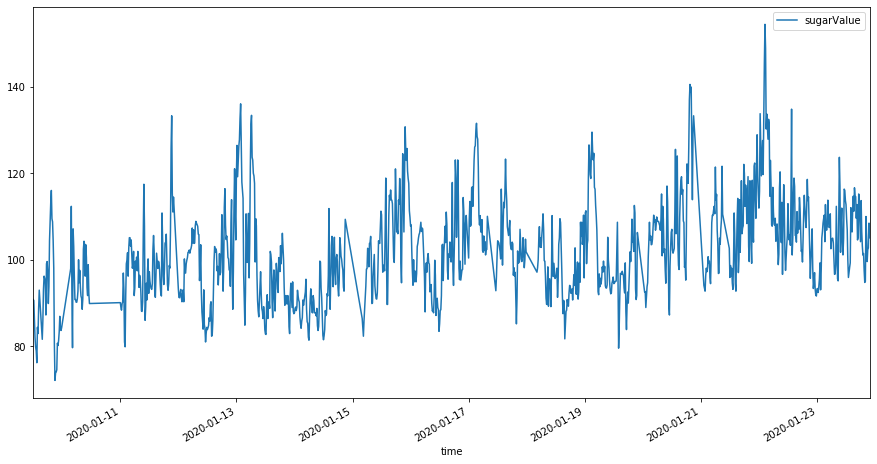

In [6]:
#visualize the data
ax = data1.plot(figsize=(15,8))



### Look the seasonal decompose

In [ ]:
seasonal_decompose(data1['sugarValue'], freq=12).plot();

### Auto Arima evaluation for chose a model 

In [ ]:
#find arima model
results = auto_arima(data1['sugarValue'], seasonal=True, m=12, trace = True)

In [ ]:
results.summary()

 ## Time series analysis and cross-validation with slide-window.

Backtest Machine Learning Models

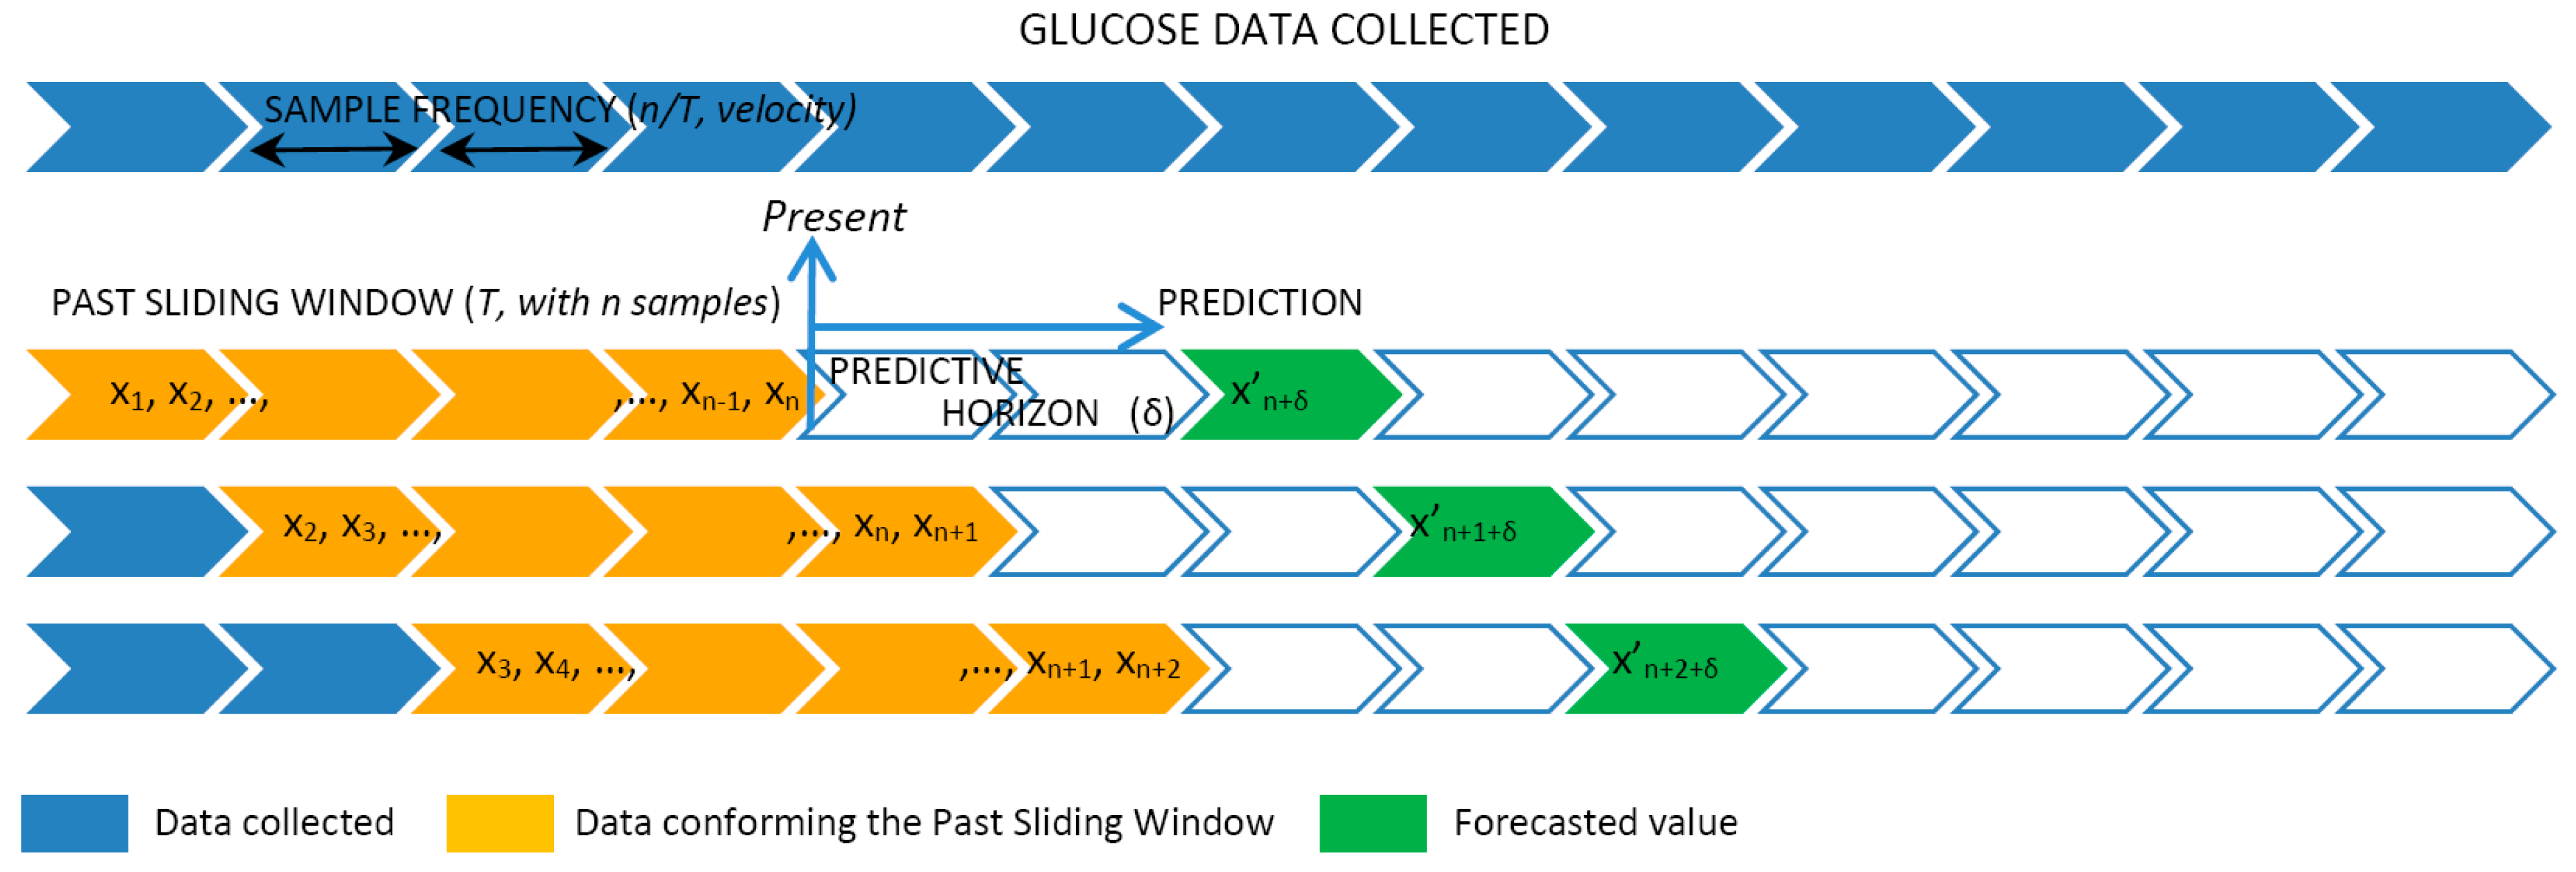


![image.png](image.png)

## Create a windows, compute the predictions and calculate the MAE and RMSE for each window. Save the values in a dataset. 





In [14]:
Arima = prediction(data1,1,0,0)

--- 16718.66809129715 Seconds for computation ---


### The dataset will show :

#### - Current train (the current window values) 
#### - Current test (the predicted values)
#### - MSE the average of the forecast error values
#### - RMSE (root mean square error)
#### - Predictive horizons (PHs) for each window.

In [15]:
Arima.head()

,Current train,Current test,MSE,RMSE,Interval,PH
0,From: 2020-01-09 12:00:00 to: 2020-01-09 15:45:00,From: 2020-01-09 16:00:00 to: 2020-01-09 16:00:00,36.977797,6.080937,3,15
1,From: 2020-01-09 12:15:00 to: 2020-01-09 16:00:00,From: 2020-01-09 16:15:00 to: 2020-01-09 16:15:00,20.344493,4.510487,3,15
2,From: 2020-01-09 12:30:00 to: 2020-01-09 16:15:00,From: 2020-01-09 16:30:00 to: 2020-01-09 16:30:00,25.294927,5.029406,3,15
3,From: 2020-01-09 12:45:00 to: 2020-01-09 16:30:00,From: 2020-01-09 16:45:00 to: 2020-01-09 16:45:00,3.827524,1.956406,3,15
4,From: 2020-01-09 13:00:00 to: 2020-01-09 16:45:00,From: 2020-01-09 17:00:00 to: 2020-01-09 17:00:00,1.544768,1.242887,3,15


In [16]:
X = data2.drop('sugarValue', axis=1)
y = data2['sugarValue']

In [17]:
RF = prediction(data2,2, X, y)

--- 17306.244809389114 Seconds for computation ---


In [18]:
SVM = prediction(data2,3, X, y)

--- 3687.3905823230743 Seconds for computation ---


## Plot the all RMSE (ARIMA; RF; SVM) in a boxplot, from 3h window to 72h window with PH from 15min to 180min



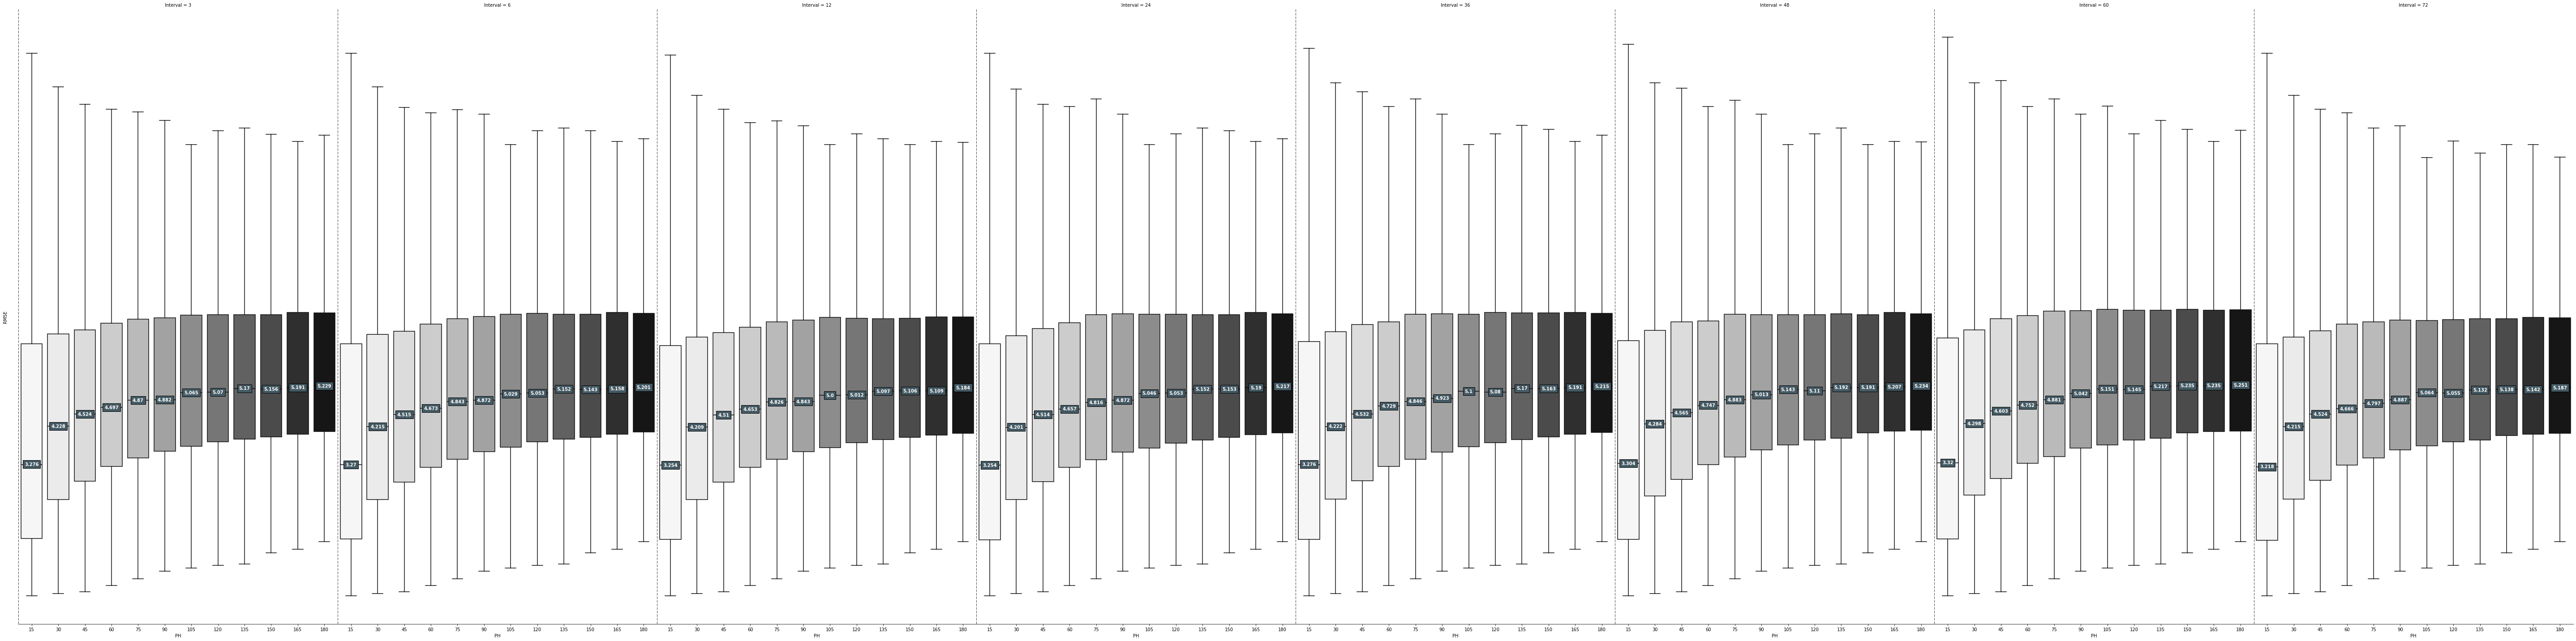

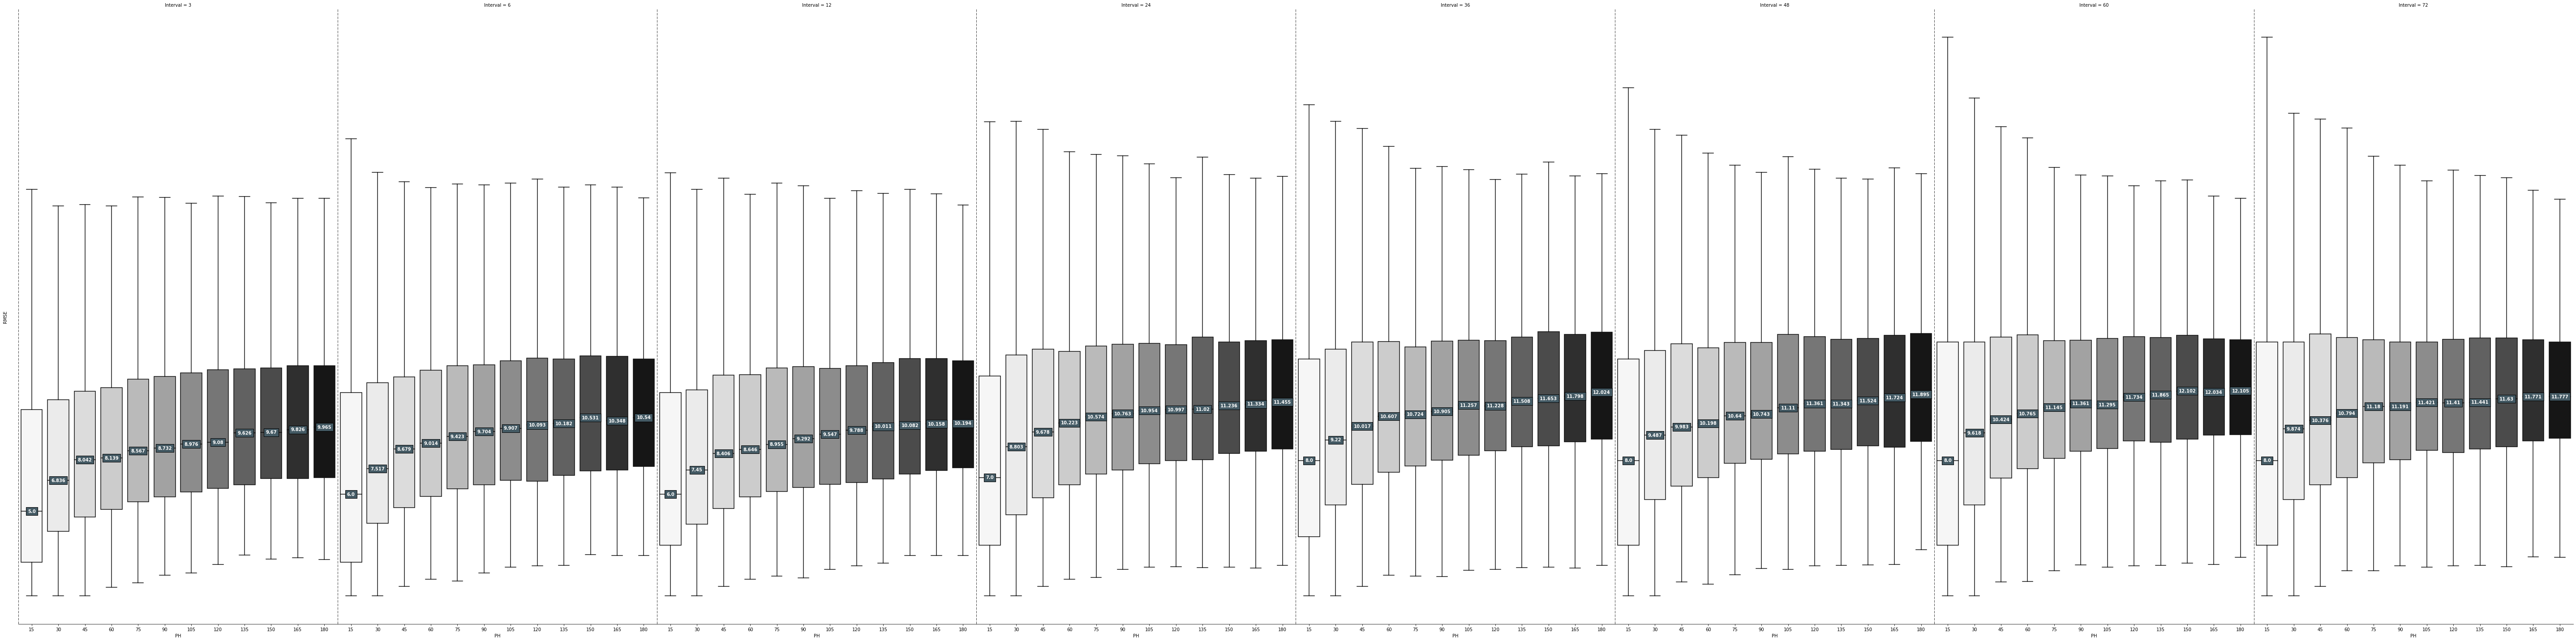

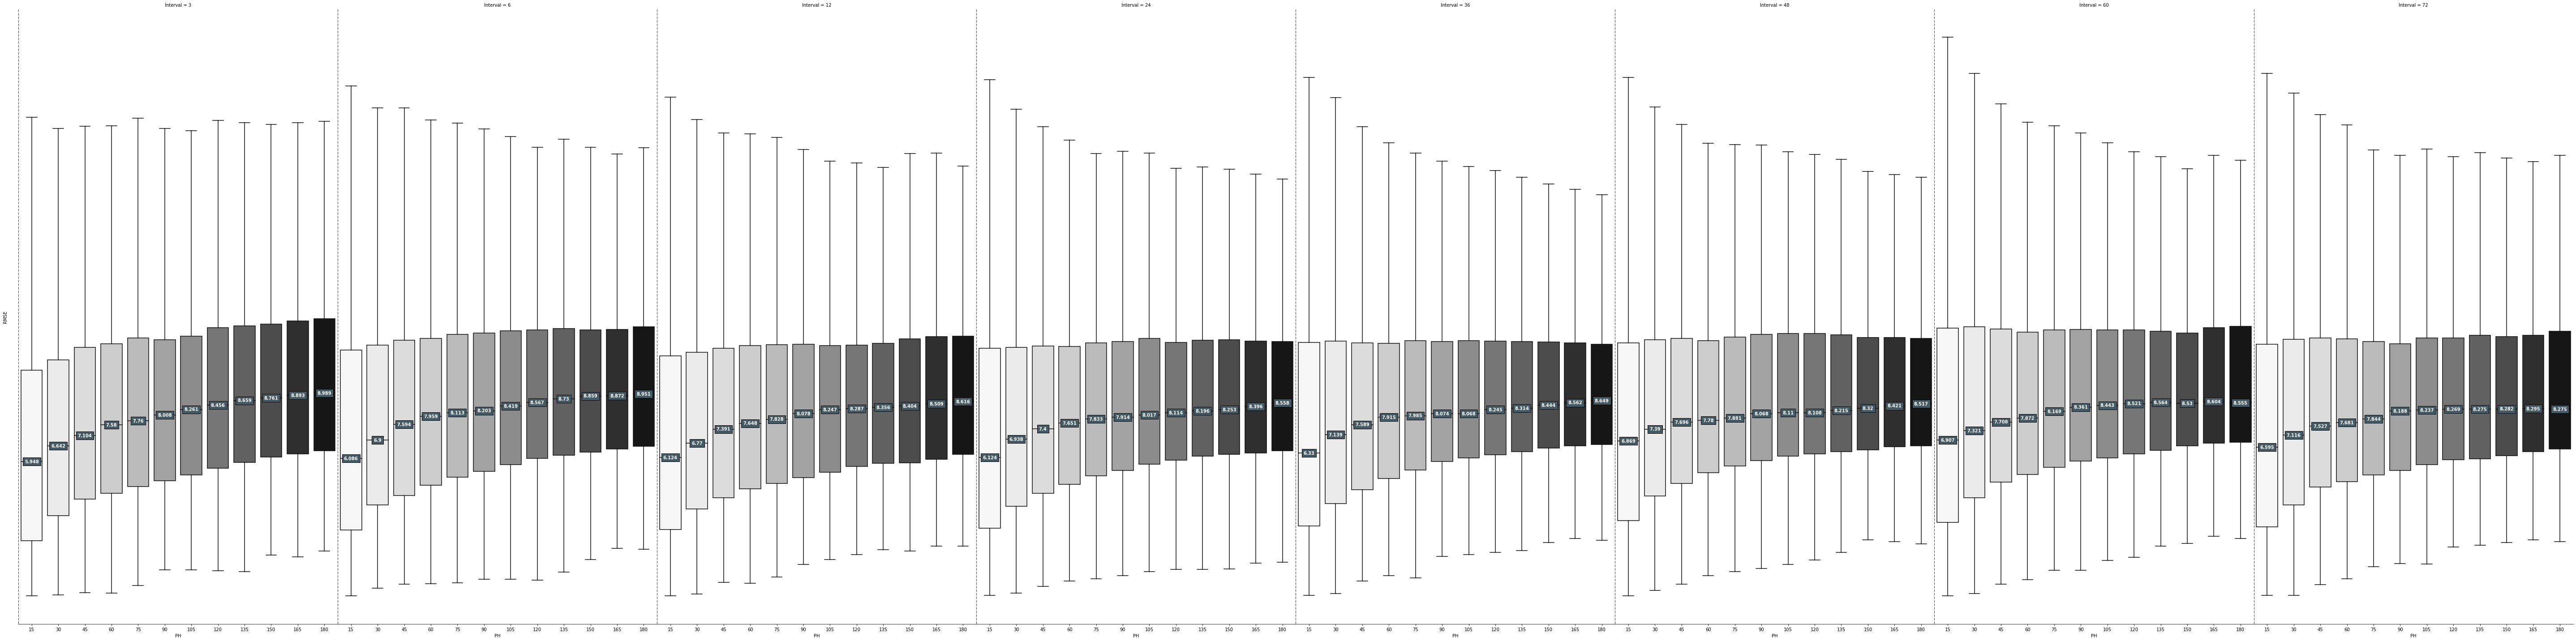

In [19]:
boxplot(Arima, "Arima")
boxplot(RF, "RF")
boxplot(SVM, "SVM")



In [20]:
joinI()